In [445]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [446]:
iris = pd.read_csv('iris.data', names=['sepal_length','sepal_width','petal_length','petal_width','target'])


In [447]:
virginica = iris.loc[iris.target == 'Iris-virginica'].index
new_iris = iris.drop(virginica)

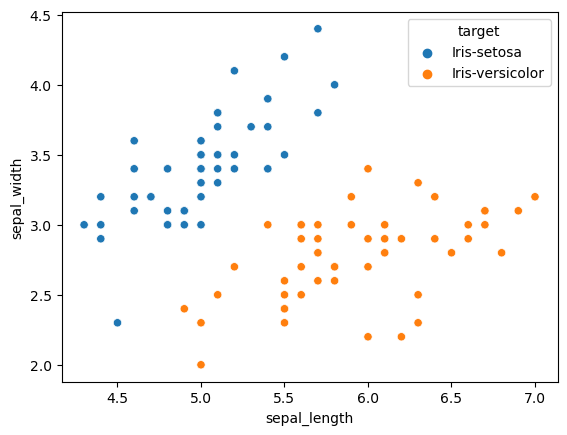

In [448]:
sns.scatterplot(data=new_iris , x = 'sepal_length', y = 'sepal_width', hue = 'target');

In [449]:
new_iris.drop(['petal_length','petal_width'], axis= 1, inplace= True)


In [450]:
def train_test_split(data,train_size):
    data = data.to_numpy()
    np.random.shuffle(data)
    # split feature and target
    x = data[:,:len(data[0]) - 1]
    y = data[:,-1]
    # split data to train and test 
    split_size = int(len(data) * train_size)
    x_train = np.array(x[0:split_size,:],dtype = float)
    x_test = np.array(x[split_size:,:],dtype = float)
    y_train = y[0:split_size]
    y_test = y[split_size:]
    return x_train, x_test, y_train, y_test
    

In [451]:

x_train, x_test, y_train, y_test = train_test_split(new_iris,0.8)

In [452]:
class Perceptron:

    def __init__(self, learning_rate=0.05, epoch=1000):
        self.lr = learning_rate
        self.epoch = epoch
        self.activation_func = self._activation
        self.weights = None
        self.bias = None

    def fit(self, features, target):
        n_samples, n_features = features.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.epoch):

            for index, sample in enumerate(features):
                # output = weight * sample + bias
                linear_output = np.dot(sample, self.weights) + self.bias
                # y_predict = activation(weight * sample + bias)
                y_predicted = self.activation_func(linear_output)
                # e = (y_actual - y_predict) * f'(y) => (y_actual - y_predict) * 1
                error = (target[index] - y_predicted)
               
                # w_new = w_old + learning_rate * e * O 
                self.weights += self.lr * error * sample
                self.bias += self.lr * error
            # if perceptron predict all target correctly, e = 0 for all sample and we exit.
            if np.equal(y_predicted,target).all():
                break;

    def predict(self, features):
        linear_output = np.dot(features, self.weights) + self.bias
        y_predicted = self.activation_func(linear_output)
        return y_predicted

    def _activation(self, x):
        return np.where(x>=0, 1, 0)

In [453]:
y_train = np.array([0 if x == 'Iris-setosa' else 1 for x in y_train])
perceptron = Perceptron()
perceptron.fit(x_train,y_train)

In [454]:
y_predict = perceptron.predict(x_test)


In [455]:
y_test = np.array([0 if x == 'Iris-setosa' else 1 for x in y_test])


In [456]:
true_detect = np.sum(np.where(y_test == y_predict , 1,0))
accuracy = true_detect / len(y_test) * 100
print(f'accuracy:{accuracy}')

accuracy:100.0


In [457]:
bias = perceptron.bias
w1,w2 = perceptron.weights
x1 = np.array([new_iris.sepal_length.min(),new_iris.sepal_length.max()])
slope = - w1/w2 
intercept = -bias/w2 
x2 = slope * x1 + intercept 
print(f'intercept: {intercept}')
print(f'slope: {slope}')

intercept: -1.2419146183699943
slope: 0.786545924967647


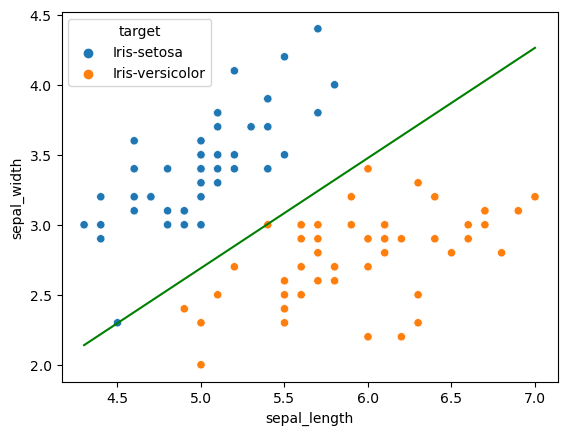

In [458]:
sns.scatterplot(data=new_iris , x = 'sepal_length', y = 'sepal_width', hue = 'target');
plt.plot(x1,x2,'g-');